# Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing dataset and checking it

In [2]:
data=pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Checking the names of the countries

In [3]:
data.Country.unique()

array(['United States'], dtype=object)

# Dropping the unnecessary columns

In [4]:
data=data.drop(['Country','City','State','Postal Code','Region'],axis=1)

# Statistical values of data

In [5]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Category      9994 non-null   object 
 3   Sub-Category  9994 non-null   object 
 4   Sales         9994 non-null   float64
 5   Quantity      9994 non-null   int64  
 6   Discount      9994 non-null   float64
 7   Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 624.8+ KB


# Total no of products sold  each category

<AxesSubplot:xlabel='Category', ylabel='count'>

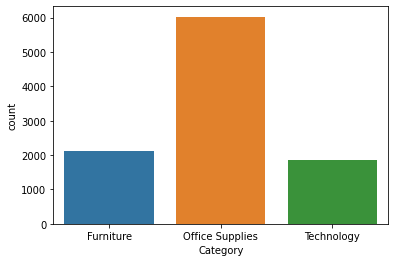

In [7]:
sns.countplot(x='Category',data=data)

# Total no of products sold in different ship modes

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

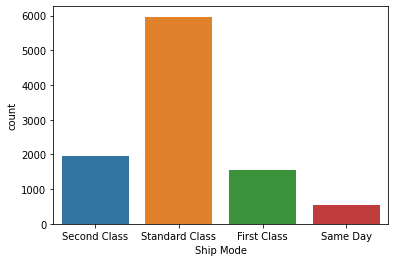

In [8]:
sns.countplot(x='Ship Mode',data=data)


# Total no of products sold in different segments

<AxesSubplot:xlabel='Segment', ylabel='count'>

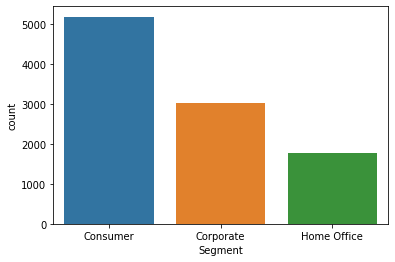

In [9]:
sns.countplot(x='Segment',data=data)

# Profit distribution in different segments

In [10]:
y=data.Segment.unique()
for i in y:
    print("The profit yielded in "+i+"Segment is "+str(data.loc[data['Segment']==i,'Profit'].sum()))


The profit yielded in ConsumerSegment is 134119.2092
The profit yielded in CorporateSegment is 91979.13399999999
The profit yielded in Home OfficeSegment is 60298.678499999995


# Profit distribution in category and sub-category

In [13]:
x=data.Category.unique()
for i in x:
    pos=data[data.Category==i]
    y=pos["Sub-Category"].unique()
    print("The Total profit in "+i+" Category is "+str(data.loc[data["Category"]==i,"Profit"].sum())+" and divided as")
    print("Sub-category:")
    for j in y:
        print(j+" = "+str(pos.loc[pos["Sub-Category"]==j,"Profit"].sum()))
    print()

The Total profit in Furniture Category is 18451.272800000006 and divided as
Sub-category:
Bookcases = -3472.5559999999996
Chairs = 26590.1663
Tables = -17725.4811
Furnishings = 13059.143600000001

The Total profit in Office Supplies Category is 122490.8008 and divided as
Sub-category:
Labels = 5546.254
Storage = 21278.8264
Art = 6527.787
Binders = 30221.7633
Appliances = 18138.005400000002
Paper = 34053.5693
Envelopes = 6964.1767
Fasteners = 949.5182
Supplies = -1189.0994999999998

The Total profit in Technology Category is 145454.9481 and divided as
Sub-category:
Phones = 44515.730599999995
Accessories = 41936.6357
Machines = 3384.7569
Copiers = 55617.82490000001



# Discount given in each segments

In [14]:
y=data.Segment.unique()
for i in y:
    print("The profit yielded in "+i+"Segment is "+str(data.loc[data['Segment']==i,'Discount'].sum()))

The profit yielded in ConsumerSegment is 820.91
The profit yielded in CorporateSegment is 477.85
The profit yielded in Home OfficeSegment is 262.33


# INFERENCE:
    1) SAME DAY DELIVERY MODE SHOULD BE PRIORITIZED SO THAT YOU GET CUSTOMER SATISFACTION IN TURN PROFIT
    2) TABLE AND CHAIR COMBO SHOULD BE SOLD OR ELSE REMOVING TABLE AS A PRODUCT FROM YOUR COMPANY CAN INCREASE YOUR PROFIT
    3) SINCE THE DISCOUNT GIVEN IN CONSUMER SEGMENT IS HIGHER WHEN COMPARED TO HOME OFFICE SEGMENT THE COMPANY CAN REDUCE IT IN CONSUMER SEGMENT AND GIVE IT IN HOME OFFICE SEGMENT TO INCREASE SALES
    4) AS THE COMPANY INCURS LOSS IN BOOKCASES AND FURNITURE SUB-CATEGORY THEY HAVE TO FIND WHAT'S WRONG IN THOSE SUB-CATEGORY, WORST CASE STOPPING IT FROM SELLING.
    5) THE PROFIT FROM HOME OFFICE SEGMENT IS LESS WHEN COMPARED TO OTHER SEGMENTS SO THE ADVERTISEMENTS CAN BE CENTRIC TO THIS SEGMENT TO ATTRACT MORE CUSTOMERS.